# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [1]:
%matplotlib inline
import ts_analysis as TsA
from plasma_parameter_calculator import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#s0611_15

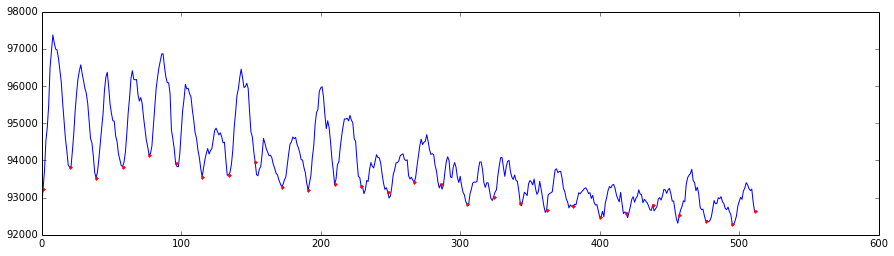

In [2]:
ts=TsA.TS_Analysis('TS_data/s0611_15 shot.asc',['TS_data/s0611_15 full power.asc','TS_data/s0611_15 full power low gain.asc'])

In [3]:
'''Split image into fibres'''
ts.split_into_fibres(discard_rows=3)
ts.norm_zero_fibres(upper=1150, lower=850)
a_angle=[45]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[135]*13#and here we have fibres 1B through 13B at an angle of 135'
ts.pair_fibres(a_angle+b_angle)

[[Model]]
    Model(Skw_multi_species_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 49
    # data points      = 260
    # variables        = 5
    chi-square         = 0.000
    reduced chi-square = 0.000
[[Variables]]
    stry:    0.06024982 +/- 0.015170 (25.18%) (init= 0)
    V_fi1:   6682.99354 +/- 816.7903 (12.22%) (init= 0)
    T_i1:    454.159096 +/- 21.72536 (4.78%) (init= 90)
    amp:     0.82589400 +/- 0.009491 (1.15%) (init= 1)
    T_e:     100.296023 +/- 5.938596 (5.92%) (init= 80)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, T_e)                  = -0.850 
    C(stry, amp)                 = -0.841 
    C(stry, T_e)                 =  0.698 
    C(T_i1, amp)                 =  0.596 
    C(T_i1, T_e)                 = -0.514 
    C(stry, T_i1)                = -0.480 


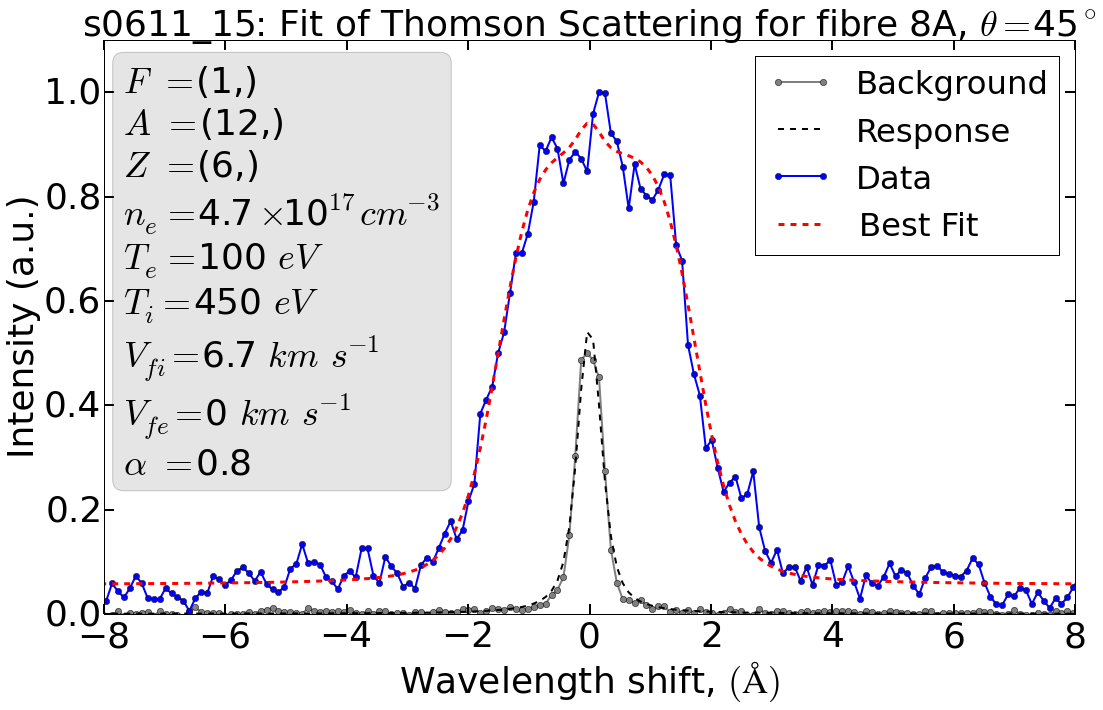

In [4]:
'''
Specify the plasma parameters in the form (Values, Minimum, Independent)
If Independent is True, then the value is fixed and minimum has no meaning
If Independent is False, then the value is an initial guess for the fit
and minimum is either a float, or None to specify no given minimum
For multi-species fits, Aj, Zj and Fj only can have their value as a tuple (A1,A2...Aj)
Even for a single-species fit, enclose A, Z and F in (), eg. 'Aj':((12), True, None)
'''
plasma_parameters={ 'model': 'multi species',
                    'n_e': (4.7e17,True),#in cm^-3, must be specified
                    'T_e': (80, False),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'Aj':  ((12,), True),#in nucleon masses, must be specified
                    'Zj':  ((6,), True),#ion effective charge, must be specified
                    'Fj':  ((1,), True),#fractional ion number density
                    'T_i1': (90, False),#In electron volts.
                    'V_fi1':(0, False),#m/s.
                    'T_i2': (400, True),#In electron volts.
                    'V_fi2':(-6e4, True),#m/s. 
                    'stry':(0.0, False), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amp': (1.0, False), #Fraction of signal made up of spectrum.
                    'offset': (0.05, True) #
                    }

'''Choose the fibre to fit'''
Fnum=8
Fset='A'
'''This code fits and plots the result'''
f=ts.select_fibre(Fnum,Fset)
f.voigt_response(gamma=1.41e-11, sigma=1.27e-11)
f.fit_fibre(plasma_parameters)
print f.skw_res.fit_report()
ts.pretty_plot(Fnum,Fset, tm=1.8)

In [160]:
TsA.ZTe_finder(n_e=2.6e17, ZTe_experimental=5*100,Z_guess=4, element='C')

(5.4417145199999997, 93.0)

In [5]:
ts.fig.savefig('s0611_15 fibre 8A largetext.pdf')

In [5]:
p=Plasma(A=12,Z=4,n_e=2e17,T_e=48,T_i=48,B=3, V=26e5,L=1.0)
p.print_dim_params()

Ion magnetisation = 0.024
Electron magnetisation = 10.0
Thermal Beta = 0.27
Kinetic Beta = 0.047
Magnetic Reynolds Number = 35.0
Lundquist number = 110.0
Haines number = 0.012
7.50196027451
